In [147]:
#importando bibliotecas base do projeto
import pandas as pd
import numpy as np

In [148]:
#bibliotecas de plotagem gráfica
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
#importando o dataset do Espirito Santo
CovidES = pd.read_csv('dadoscovidES/DadosCovidES_1.csv', sep=';',skip_blank_lines = True, encoding = "latin-1")

In [150]:
#Dados base
CovidES.describe()

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
count,3348699,3348699,3348699,1347254,1740604,98025,145533,2748653,19230,3348699,...,3348699,3348699,3348699,3348699,3348699,3348699,3348699,3348699,3348699,3348699
unique,728,698,789,833,844,713,731,778,700,4,...,4,4,4,3,3,4,4,4,4,4
top,2022-01-27,2022-01-27,2022-01-24,2021-03-22,2022-01-27,2020-07-20,2020-07-28,2022-02-10,2021-04-12,Descartados,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
freq,41877,38310,40046,5273,38692,963,2718,26103,97,1814313,...,1655160,1865004,2803925,3277039,3297085,2103247,1619680,3251249,3203449,1764106


In [151]:
CovidES.head()

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,2022-02-22,2021-07-01,2022-02-20,NaN,2022-02-22,NaN,NaN,NaN,NaN,Confirmados,...,Não,Ignorado,Não,Não,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
1,2022-02-22,2021-07-26,2021-07-18,2022-02-22,2022-02-22,NaN,NaN,2021-07-31,NaN,Suspeito,...,Ignorado,Ignorado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
2,2022-02-22,2022-01-26,2022-01-23,NaN,2022-02-22,NaN,NaN,2022-01-26,NaN,Confirmados,...,Não,Não,Sim,Não,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
3,2022-02-22,2020-06-24,2022-02-20,NaN,2022-02-22,NaN,NaN,NaN,NaN,Confirmados,...,Não,Não,Não,Não,Não,Não Informado,Positivo,Não Informado,Não Informado,Teste rápido Antígeno
4,2022-02-22,2022-02-22,2022-02-22,NaN,2022-02-22,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Teste rápido Antígeno


In [152]:
CovidES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348699 entries, 0 to 3348698
Data columns (total 45 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   DataNotificacao          object
 1   DataCadastro             object
 2   DataDiagnostico          object
 3   DataColeta_RT_PCR        object
 4   DataColetaTesteRapido    object
 5   DataColetaSorologia      object
 6   DataColetaSorologiaIGG   object
 7   DataEncerramento         object
 8   DataObito                object
 9   Classificacao            object
 10  Evolucao                 object
 11  CriterioConfirmacao      object
 12  StatusNotificacao        object
 13  Municipio                object
 14  Bairro                   object
 15  FaixaEtaria              object
 16  IdadeNaDataNotificacao   object
 17  Sexo                     object
 18  RacaCor                  object
 19  Escolaridade             object
 20  Gestante                 object
 21  Febre                    object

# Tratamento de dados

In [153]:
#Visualizando os valores unicos dos resultados

print('Valores unicos RT_PCR:',CovidES['ResultadoRT_PCR'].unique())
print('Valores unicos de teste rápido:',CovidES['ResultadoTesteRapido'].unique())
print('Valores unicos de teste Sorológico:',CovidES['ResultadoSorologia'].unique())
print('Valores unicos de teste de Sorologia IGG:',CovidES['ResultadoSorologia_IGG'].unique())
print('Valores unicos de Classificação:',CovidES['Classificacao'].unique())

Valores unicos RT_PCR: ['Não Informado' 'Inconclusivo' 'Negativo' 'Positivo']
Valores unicos de teste rápido: ['Positivo' 'Negativo' 'Não Informado' 'Inconclusivo']
Valores unicos de teste Sorológico: ['Não Informado' 'Reagente' 'Não Reagente' 'Inconclusivo']
Valores unicos de teste de Sorologia IGG: ['Não Informado' 'Reagente' 'Não Reagente' 'Inconclusivo']
Valores unicos de Classificação: ['Confirmados' 'Suspeito' 'Descartados' 'Síndrome Gripal não Especificada']


In [154]:
#Visualizando os valores unicos dos sintomas

print('Valores unicos Febre:',CovidES['Febre'].unique())
print('Valores unicos Coriza:',CovidES['Coriza'].unique())
print('Valores unicos Tosse:',CovidES['Tosse'].unique())
print('Valores unicos Dor de Garganta:',CovidES['DorGarganta'].unique())
print('Valores unicos Dificuldade Respiratória:',CovidES['DificuldadeRespiratoria'].unique())
print('Valores unicos Dificuldade Respiratória:',CovidES['Diarreia'].unique())
print('Valores unicos Dificuldade Respiratória:',CovidES['Cefaleia'].unique())

Valores unicos Febre: ['Não' 'Sim' '-']
Valores unicos Coriza: ['Não' 'Sim' '-']
Valores unicos Tosse: ['Sim' 'Não' '-']
Valores unicos Dor de Garganta: ['Não' 'Sim' '-']
Valores unicos Dificuldade Respiratória: ['Não' 'Sim' '-']
Valores unicos Dificuldade Respiratória: ['Não' 'Sim' '-']
Valores unicos Dificuldade Respiratória: ['Sim' 'Não' '-']


In [155]:
print('Contagem de valores na coluna Febre \n',CovidES['Febre'].value_counts())
print('\n')
print('Contagem de valores na coluna Coriza \n',CovidES['Coriza'].value_counts())
print('\n')
print('Contagem de valores na coluna Tosse \n',CovidES['Tosse'].value_counts())
print('\n')
print('Contagem de valores na coluna Dor de Garganta \n',CovidES['DorGarganta'].value_counts())
print('\n')
print('Contagem de valores na coluna Dificuldade Respiratória \n',CovidES['DificuldadeRespiratoria'].value_counts())
print('\n')
print('Contagem de valores na coluna Diarreia \n',CovidES['Diarreia'].value_counts())
print('\n')
print('Contagem de valores na coluna Cefaleia \n',CovidES['Cefaleia'].value_counts())
print('\n')


Contagem de valores na coluna Febre 
 Não    2370247
Sim     976535
-         1917
Name: Febre, dtype: int64


Contagem de valores na coluna Coriza 
 Não    2155060
Sim    1191901
-         1738
Name: Coriza, dtype: int64


Contagem de valores na coluna Tosse 
 Não    1855538
Sim    1491418
-         1743
Name: Tosse, dtype: int64


Contagem de valores na coluna Dor de Garganta 
 Não    2335029
Sim    1011707
-         1963
Name: DorGarganta, dtype: int64


Contagem de valores na coluna Dificuldade Respiratória 
 Não    3033280
Sim     313709
-         1710
Name: DificuldadeRespiratoria, dtype: int64


Contagem de valores na coluna Diarreia 
 Não    3033786
Sim     313062
-         1851
Name: Diarreia, dtype: int64


Contagem de valores na coluna Cefaleia 
 Não    2013966
Sim    1332672
-         2061
Name: Cefaleia, dtype: int64




In [156]:
#removendo dados que nao apresentam relevância em Sintomas
CovidES.drop(CovidES.loc[CovidES['Febre']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['Coriza']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['Tosse']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['DorGarganta']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['DificuldadeRespiratoria']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['Diarreia']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['Cefaleia']=='-'].index, inplace=True)

In [157]:
CovidES.columns

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito',
       'Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
       'MoradorDeRua', 'ResultadoRT_PCR', 'ResultadoTesteRapido',
       'ResultadoSorologia', 'ResultadoSorologia_IGG', 'TipoTesteRapido'],
      dtype='object')

In [158]:
#criando a função que irá converter os sintomas para numero
def convert_to_number(base):
    if(base == 'Sim'):
        return 1
    elif(base == 'Não'):
        return 0
    else:
        return np.nan

In [159]:
#convertendo sintomas para numero
#aplicando a base de conversão de numero nos sintomas levantados - Caso 1 - sim 
#Caso 0 - Não. Qualquer valor diferente desses receberá null
CovidES['Febre_n'] = CovidES['Febre'].apply(convert_to_number)
CovidES['Tosse_n'] = CovidES['Tosse'].apply(convert_to_number)
CovidES['Coriza_n']= CovidES['Coriza'].apply(convert_to_number)
CovidES['DorGarganta_n']=CovidES['DorGarganta'].apply(convert_to_number)
CovidES['Diarreia_n']=CovidES['Diarreia'].apply(convert_to_number)
CovidES['Cefaleia_n']=CovidES['Cefaleia'].apply(convert_to_number)
CovidES['DificuldadeRespiratoria_n']=CovidES['DificuldadeRespiratoria'].apply(convert_to_number)

In [160]:
#removendo as colunas que tiveram seus valores convertidos e alocados e outras colunas
CovidES = CovidES.drop(columns=['Febre','DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia','Cefaleia'])

In [161]:
#convertendo as datas que serão utilizadas de string para datetime
CovidES['dataNotificacao'] = pd.to_datetime(CovidES['DataNotificacao'],format='%Y-%m-%d')
CovidES['dataCadastro'] = pd.to_datetime(CovidES['DataCadastro'],format='%Y-%m-%d')

In [162]:
#removendo os dados que foram convertidos e dados que nao serão utilizados no projeto
CovidES = CovidES.drop(columns=['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito'])

In [163]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'ComorbidadePulmao',
       'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes',
       'ComorbidadeTabagismo', 'ComorbidadeObesidade', 'FicouInternado',
       'ViagemBrasil', 'ViagemInternacional', 'ProfissionalSaude',
       'PossuiDeficiencia', 'MoradorDeRua', 'ResultadoRT_PCR',
       'ResultadoTesteRapido', 'ResultadoSorologia', 'ResultadoSorologia_IGG',
       'TipoTesteRapido', 'Febre_n', 'Tosse_n', 'Coriza_n', 'DorGarganta_n',
       'Diarreia_n', 'Cefaleia_n', 'DificuldadeRespiratoria_n',
       'dataNotificacao', 'dataCadastro'],
      dtype='object')

In [164]:
print('Valores unicos Comorbidade no Pulmão:',CovidES['ComorbidadePulmao'].unique())
print('Valores unicos Comorbidade - Coração:',CovidES['ComorbidadeCardio'].unique())
print('Valores unicos Comorbidade - Rins:',CovidES['ComorbidadeRenal'].unique())
print('Valores unicos Comorbidade - Diabetes:',CovidES['ComorbidadeDiabetes'].unique())
print('Valores unicos Comorbidade - Tabagismo:',CovidES['ComorbidadeTabagismo'].unique())
print('Valores unicos Comorbidade - Obesidade:',CovidES['ComorbidadeObesidade'].unique())


Valores unicos Comorbidade no Pulmão: ['Não' 'Sim' '-']
Valores unicos Comorbidade - Coração: ['Não' 'Sim' '-']
Valores unicos Comorbidade - Rins: ['Não' 'Sim' '-']
Valores unicos Comorbidade - Diabetes: ['Não' 'Sim' '-']
Valores unicos Comorbidade - Tabagismo: ['Sim' 'Não' '-']
Valores unicos Comorbidade - Obesidade: ['Não' 'Sim' '-']


In [165]:
print('Contagem de valores na coluna Comorbidade Pulmao \n',CovidES['ComorbidadePulmao'].value_counts())
print('\n')
print('Contagem de valores na coluna Comorbidade Cardio \n',CovidES['ComorbidadeCardio'].value_counts())
print('\n')
print('Contagem de valores na coluna Comorbidade Renal \n',CovidES['ComorbidadeRenal'].value_counts())
print('\n')
print('Contagem de valores na coluna Comorbidade Diabetes \n',CovidES['ComorbidadeDiabetes'].value_counts())
print('\n')
print('Contagem de valores na coluna Comorbidade Tabagismo \n',CovidES['ComorbidadeTabagismo'].value_counts())
print('\n')
print('Contagem de valores na coluna Comorbidade Obesidade \n',CovidES['ComorbidadeObesidade'].value_counts())
print('\n')

Contagem de valores na coluna Comorbidade Pulmao 
 Não    3272708
Sim      71543
-         1628
Name: ComorbidadePulmao, dtype: int64


Contagem de valores na coluna Comorbidade Cardio 
 Não    3055221
Sim     289116
-         1542
Name: ComorbidadeCardio, dtype: int64


Contagem de valores na coluna Comorbidade Renal 
 Não    3336179
Sim       8377
-         1323
Name: ComorbidadeRenal, dtype: int64


Contagem de valores na coluna Comorbidade Diabetes 
 Não    3246207
Sim      98238
-         1434
Name: ComorbidadeDiabetes, dtype: int64


Contagem de valores na coluna Comorbidade Tabagismo 
 Não    3297278
Sim      47211
-         1390
Name: ComorbidadeTabagismo, dtype: int64


Contagem de valores na coluna Comorbidade Obesidade 
 Não    3299641
Sim      44235
-         2003
Name: ComorbidadeObesidade, dtype: int64




In [166]:
#removendo dados que nao apresentam relevância em Comorbidade
CovidES.drop(CovidES.loc[CovidES['ComorbidadePulmao']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['ComorbidadeCardio']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['ComorbidadeRenal']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['ComorbidadeDiabetes']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['ComorbidadeTabagismo']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['ComorbidadeObesidade']=='-'].index, inplace=True)


In [167]:
#convertendo Comorbidades para numero
#Caso 1 - Sim, Caso 0 - Não
CovidES['comorbidadePulmao'] = CovidES['ComorbidadePulmao'].apply(convert_to_number)
CovidES['comorbidadeCardio'] = CovidES['ComorbidadeCardio'].apply(convert_to_number)
CovidES['comorbidadeRenal'] = CovidES['ComorbidadeRenal'].apply(convert_to_number)
CovidES['comorbidadeDiabetes'] = CovidES['ComorbidadeDiabetes'].apply(convert_to_number)
CovidES['comorbidadeTabagismo'] = CovidES['ComorbidadeTabagismo'].apply(convert_to_number)
CovidES['comorbidadeObesidade'] = CovidES['ComorbidadeObesidade'].apply(convert_to_number)

In [168]:
#removendo as colunas de comorbidades que tiveram os dados convertidos 
CovidES = CovidES.drop(columns=['ComorbidadePulmao','ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes',
                                'ComorbidadeTabagismo', 'ComorbidadeObesidade'])

In [169]:
#bloco 3.2.4 do documento
print('Contagem de incidências na coluna de Gestante \n',CovidES['Gestante'].value_counts())
print('\n')
print('Contagem de incidências na coluna de Realizou Viagem Internacional ?\n',CovidES['ViagemInternacional'].value_counts())
print('\n')
print('Contagem de incidências na coluna de Realizou Viagem no Brasil? \n',CovidES['ViagemBrasil'].value_counts())
print('\n')
print('Contagem de incidências na coluna de Possui deficiência? \n',CovidES['PossuiDeficiencia'].value_counts())
print('\n')
print('Contagem de incidências na coluna Morador de Rua? \n',CovidES['MoradorDeRua'].value_counts())
print('\n')
print('Contagem de incidências na coluna profissional de Saude? \n',CovidES['ProfissionalSaude'].value_counts())
print('\n')

Contagem de incidências na coluna de Gestante 
 Não                           1808457
Não se aplica                 1507009
3º trimeste                     10646
Ignorado                         7356
2º trimeste                      4793
1º trimeste                      3636
Idade gestacional ignorada       1015
Name: Gestante, dtype: int64


Contagem de incidências na coluna de Realizou Viagem Internacional ?
 Não Informado    1862351
Não              1315801
Ignorado          161835
Sim                 2925
Name: ViagemInternacional, dtype: int64


Contagem de incidências na coluna de Realizou Viagem no Brasil? 
 Não Informado    1652733
Não              1398378
Ignorado          182707
Sim               109094
Name: ViagemBrasil, dtype: int64


Contagem de incidências na coluna de Possui deficiência? 
 Não              3271788
Sim                41678
Não Informado      29446
Name: PossuiDeficiencia, dtype: int64


Contagem de incidências na coluna Morador de Rua? 
 Não             

In [170]:
#excluindo colunas que nao serão utilizadas por nao possuir tanta relevância para o projeto
CovidES = CovidES.drop(columns=['Gestante','ViagemInternacional','ViagemBrasil','PossuiDeficiencia',
                                'MoradorDeRua','ProfissionalSaude'])

In [171]:
#bloco 3.2.5 do documento
print('Contagem de incidências na coluna Criterio de Confirmação \n',CovidES['CriterioConfirmacao'].value_counts())
print('\n')
print('Contagem de incidências na coluna Morador de Status de Notificação? \n',CovidES['StatusNotificacao'].value_counts())
print('\n')
print('Contagem de incidências na coluna Ficou Internado? \n',CovidES['FicouInternado'].value_counts())
print('\n')

Contagem de incidências na coluna Criterio de Confirmação 
 Laboratorial             2793374
-                         251847
Clinico                   225920
Clinico Epdemiologico      71771
Name: CriterioConfirmacao, dtype: int64


Contagem de incidências na coluna Morador de Status de Notificação? 
 Encerrado    2743664
Em Aberto     599248
Name: StatusNotificacao, dtype: int64


Contagem de incidências na coluna Ficou Internado? 
 Não Informado    1896804
Não              1288468
Ignorado          134821
Sim                22819
Name: FicouInternado, dtype: int64




In [172]:
#removendo as colunas criterio confirmação e StatusNotificacao
CovidES = CovidES.drop(columns=['CriterioConfirmacao','StatusNotificacao','FicouInternado'])

In [173]:
#bloco 3.2.6 do documento
print('Contagem de incidências na coluna classificacao \n',CovidES['Classificacao'].value_counts())
print('\n')
print('Contagem de incidências na coluna Evolução \n',CovidES['Evolucao'].value_counts())
print('\n')
print('Contagem de incidências na coluna Escolaridade \n',CovidES['Escolaridade'].value_counts())
print('\n')

Contagem de incidências na coluna classificacao 
 Descartados                         1811827
Confirmados                         1011451
Suspeito                             490817
Síndrome Gripal não Especificada      28817
Name: Classificacao, dtype: int64


Contagem de incidências na coluna Evolução 
 Ignorado                   1666984
Cura                        908475
-                           748541
Óbito pelo COVID-19          13916
Óbito por outras causas       4996
Name: Evolucao, dtype: int64


Contagem de incidências na coluna Escolaridade 
 Ignorado                                                       1274791
Ensino médio completo (antigo colegial ou 2º grau )             684931
Educação superior completa                                      410330
5ª à 8ª série incompleta do EF (antigo ginásio ou 1º grau)      207050
Ensino médio incompleto (antigo colegial ou 2º grau )           157963
Ensino fundamental completo (antigo ginásio ou 1º grau)         141927
Não se aplic

In [174]:
#removendo linhas de Sindrome Gripal não especificada de classificações
CovidES.drop(CovidES.loc[CovidES['Classificacao']=='Síndrome Gripal não Especificada'].index, inplace=True)

In [175]:
#função que converte classificação para numeros
def class_to_number(base):
    if(base == 'Confirmados'):
        return 0
    elif(base == 'Suspeito'):
        return 1
    elif(base == 'Descartados'):
        return 2
    else:
        return -1

In [176]:
#função que converte a evolução dos casos para numeros
def evol_to_number(base):
    if(base == 'Cura'):
        return 0
    elif(base == 'Óbito pelo COVID-19'):
        return 1
    elif(base == 'Óbito por outras causas'):
        return 2
    else:
        return -1

In [177]:
#funcao que converte escolaridade para indices numericos
def schooling_to_number(base):
    if(base == 'Ignorado'):
        return 10
    elif(base == 'Não se aplica'):
        return 9
    elif(base  == 'Educação superior incompleta'):
        return 8
    elif(base == 'Analfabeto'):
        return 7
    elif(base == '4ª série completa do EF (antigo primário ou 1º grau)'):
        return 6
    elif(base == '1ª a 4ª série incompleta do EF (antigo primário ou 1º grau)'):
        return 5
    elif(base == 'Ensino fundamental completo (antigo ginásio ou 1º grau)'):
        return 4
    elif(base == 'Ensino médio incompleto (antigo colegial ou 2º grau )'):
        return 3
    elif(base == '5ª à 8ª série incompleta do EF (antigo ginásio ou 1º grau)'):
        return 2
    elif(base == 'Educação superior completa'):
        return 1
    elif(base == 'Ensino médio completo (antigo colegial ou 2º grau )'):
        return 0 
    else:
        return -1

In [178]:
#aplicando as funções nas colunas
CovidES['classificacao'] = CovidES['Classificacao'].apply(class_to_number)
CovidES['evolucao'] = CovidES['Evolucao'].apply(evol_to_number)
CovidES['escolaridade'] = CovidES['Escolaridade'].apply(schooling_to_number)

In [179]:
#3.2.7 do documento
print('Contagem de incidências na coluna Sexo? \n',CovidES['Sexo'].value_counts())
print('\n')

Contagem de incidências na coluna Sexo? 
 F    1817624
M    1495727
I        744
Name: Sexo, dtype: int64




In [180]:
#criando uma função para converter sexo para numeros
def sex_to_number(base):
    if(base == 'F'):
        return 0
    elif(base =='M'):
        return 1
    elif(base =='I'):
        return 2
    else:
        np.nan
        

In [181]:
#será 
# 0 - F
# 1 - M
# 2 - I

CovidES['sexo'] = CovidES['Sexo'].apply(sex_to_number)

In [182]:
#removendo os resultados de testes, pois serao controlados de acordo com a Classificação
CovidES = CovidES.drop(columns=['ResultadoRT_PCR', 'ResultadoTesteRapido', 'ResultadoSorologia','ResultadoSorologia_IGG', 'TipoTesteRapido',])

In [183]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade', 'Febre_n',
       'Tosse_n', 'Coriza_n', 'DorGarganta_n', 'Diarreia_n', 'Cefaleia_n',
       'DificuldadeRespiratoria_n', 'dataNotificacao', 'dataCadastro',
       'comorbidadePulmao', 'comorbidadeCardio', 'comorbidadeRenal',
       'comorbidadeDiabetes', 'comorbidadeTabagismo', 'comorbidadeObesidade',
       'classificacao', 'evolucao', 'escolaridade', 'sexo'],
      dtype='object')

In [184]:
# 3.2.8 - DO DOCUMENTO
print('Contagem de incidências na coluna Raca Cor? \n',CovidES['RacaCor'].value_counts())
print('\n')

Contagem de incidências na coluna Raca Cor? 
 Parda       1127893
Branca       932857
Ignorado     874958
Amarela      192778
Preta        178225
Indigena       7384
Name: RacaCor, dtype: int64




In [185]:
#função que transforma raça e cor para numero
def race_to_number(base):
    if(base == 'Parda'):
        return 0
    elif(base == 'Branca'): 
        return 1
    elif(base == 'Ignorado'):
        return -1
    elif(base == 'Amarela'):
        return 2
    elif(base == 'Preta'):
        return 3
    elif(base == 'Indigena'):
        return 4
    else: 
        np.nan

In [186]:
#aplicando a função na nova coluna
CovidES['raca_cor'] = CovidES['RacaCor'].apply(race_to_number)

In [187]:
CovidES.head(100)['IdadeNaDataNotificacao']

0      43 anos, 10 meses, 10 dias
1       40 anos, 11 meses, 7 dias
2       30 anos, 9 meses, 25 dias
3       61 anos, 0 meses, 19 dias
4       49 anos, 3 meses, 30 dias
                  ...            
97      15 anos, 5 meses, 21 dias
98      30 anos, 2 meses, 14 dias
99      37 anos, 5 meses, 12 dias
100     32 anos, 9 meses, 15 dias
101      35 anos, 0 meses, 2 dias
Name: IdadeNaDataNotificacao, Length: 100, dtype: object

In [188]:
#importando string 
import string

In [189]:
#criando função para recuperar a idade da String
def get_idade(base):
        base.strip()
        idade = base[0:2]
        return int(idade)
    
    

In [190]:
#aplicando a função na nova base
CovidES['idade'] = CovidES['IdadeNaDataNotificacao'].apply(get_idade)

In [191]:
CovidES.head(10)

,Classificacao,Evolucao,Municipio,Bairro,FaixaEtaria,IdadeNaDataNotificacao,Sexo,RacaCor,Escolaridade,Febre_n,...,comorbidadeRenal,comorbidadeDiabetes,comorbidadeTabagismo,comorbidadeObesidade,classificacao,evolucao,escolaridade,sexo,raca_cor,idade
0,Confirmados,Ignorado,PIUMA,NOVA ESPERANÇA,40 a 49 anos,"43 anos, 10 meses, 10 dias",M,Preta,4ª série completa do EF (antigo primário ou 1º...,0,...,0,0,1,0,0,-1,6,1,3,43
1,Suspeito,Ignorado,SERRA,PARQUE JACARAÍPE,40 a 49 anos,"40 anos, 11 meses, 7 dias",F,Ignorado,Ignorado,0,...,0,0,0,0,1,-1,10,0,-1,40
2,Confirmados,Ignorado,VITORIA,SANTA LÚCIA,30 a 39 anos,"30 anos, 9 meses, 25 dias",F,Branca,Ignorado,0,...,0,0,0,0,0,-1,10,0,1,30
3,Confirmados,Ignorado,PIUMA,JARDIM MAILY,60 a 69 anos,"61 anos, 0 meses, 19 dias",F,Branca,4ª série completa do EF (antigo primário ou 1º...,0,...,0,0,0,1,0,-1,6,0,1,61
4,Suspeito,-,MUNIZ FREIRE,CENTRO,40 a 49 anos,"49 anos, 3 meses, 30 dias",F,Parda,Ignorado,0,...,0,0,0,0,1,-1,10,0,0,49
5,Confirmados,Ignorado,PIUMA,NOVA ESPERANÇA,0 a 4 anos,"4 anos, 8 meses, 18 dias",M,Branca,Não se aplica,1,...,0,0,0,0,0,-1,9,1,1,4
6,Suspeito,-,VITORIA,UNIVERSITÁRIO,40 a 49 anos,"40 anos, 9 meses, 15 dias",F,Ignorado,Ignorado,0,...,0,0,0,0,1,-1,10,0,-1,40
7,Suspeito,Ignorado,PIUMA,NITEROI,40 a 49 anos,"45 anos, 9 meses, 20 dias",F,Branca,Ensino médio completo (antigo colegial ou 2º g...,0,...,0,0,0,0,1,-1,-1,0,1,45
8,Descartados,-,VILA VELHA,ULISSES GUIMARÃES,70 a 79 anos,"74 anos, 7 meses, 6 dias",F,Parda,Ensino médio completo (antigo colegial ou 2º g...,0,...,0,1,0,0,2,-1,-1,0,0,74
9,Suspeito,Ignorado,PIUMA,PRAIA DE ACAIACA,30 a 39 anos,"30 anos, 2 meses, 28 dias",M,Branca,Educação superior completa,1,...,0,0,0,0,1,-1,1,1,1,30


In [192]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade', 'Febre_n',
       'Tosse_n', 'Coriza_n', 'DorGarganta_n', 'Diarreia_n', 'Cefaleia_n',
       'DificuldadeRespiratoria_n', 'dataNotificacao', 'dataCadastro',
       'comorbidadePulmao', 'comorbidadeCardio', 'comorbidadeRenal',
       'comorbidadeDiabetes', 'comorbidadeTabagismo', 'comorbidadeObesidade',
       'classificacao', 'evolucao', 'escolaridade', 'sexo', 'raca_cor',
       'idade'],
      dtype='object')

In [193]:
CovidES.drop(columns=[ 'Municipio', 'Bairro'],inplace=True)

In [194]:
#remoção de valores duplicados
CovidES=CovidES.drop_duplicates()

In [195]:
#por interesses proprios resolvi guardar algumas colunas que poderiam ter sido eliminadas
CovidES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3293696 entries, 0 to 3348698
Data columns (total 28 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Classificacao              object        
 1   Evolucao                   object        
 2   FaixaEtaria                object        
 3   IdadeNaDataNotificacao     object        
 4   Sexo                       object        
 5   RacaCor                    object        
 6   Escolaridade               object        
 7   Febre_n                    int64         
 8   Tosse_n                    int64         
 9   Coriza_n                   int64         
 10  DorGarganta_n              int64         
 11  Diarreia_n                 int64         
 12  Cefaleia_n                 int64         
 13  DificuldadeRespiratoria_n  int64         
 14  dataNotificacao            datetime64[ns]
 15  dataCadastro               datetime64[ns]
 16  comorbidadePulmao          int64    

# Explorando dados 

In [196]:
confirmados = CovidES[CovidES['Classificacao']=='Confirmados']

<AxesSubplot:xlabel='dataCadastro'>

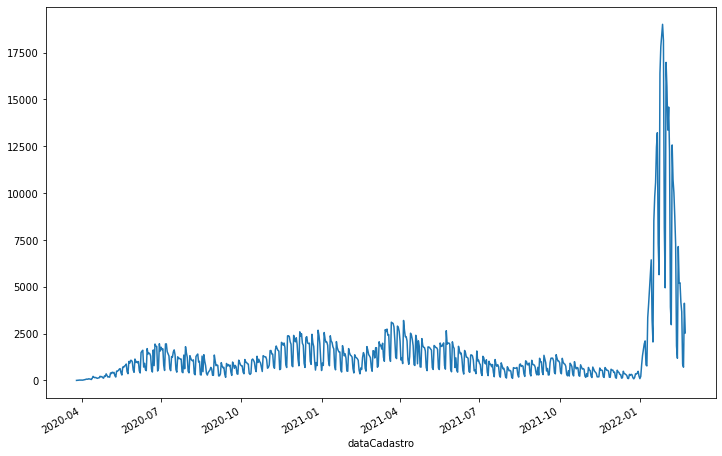

In [197]:
#Cadastros de casos confirmados
plt.figure(figsize=(12,8))
confirmados.groupby(by='dataCadastro')['Classificacao'].count().plot()

In [198]:
#Variavel que recebera os dados para analises de series temporais
temporal_es = confirmados.groupby(by='dataCadastro')['Classificacao'].count()

In [199]:
temporal_es = pd.DataFrame(temporal_es)

In [200]:
temporal_es

,Classificacao
dataCadastro,
2020-03-26,1
2020-03-30,20
2020-03-31,15
2020-04-01,18
2020-04-02,14
...,...
2022-02-18,3658
2022-02-19,866
2022-02-20,706


<AxesSubplot:xlabel='idade', ylabel='Count'>

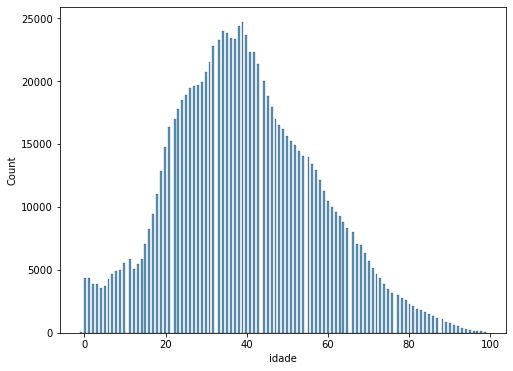

In [201]:
#histograma de idade
plt.figure(figsize=(8,6))
sns.histplot(x='idade',data=confirmados)

<AxesSubplot:xlabel='RacaCor', ylabel='count'>

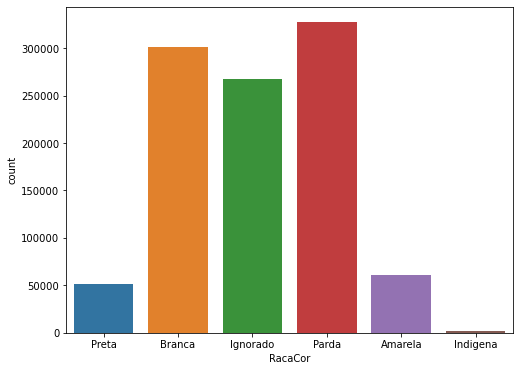

In [202]:
#Raça
plt.figure(figsize=(8,6))
sns.countplot(x=confirmados['RacaCor'],data=CovidES)

<AxesSubplot:xlabel='Febre_n', ylabel='count'>

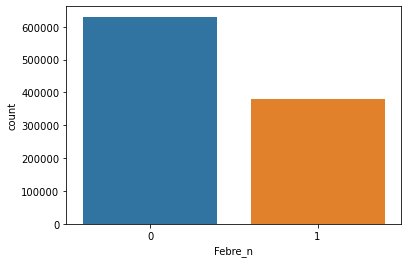

In [203]:
#Sintoma - Febre
sns.countplot(x='Febre_n',data=confirmados)

<AxesSubplot:xlabel='Tosse_n', ylabel='count'>

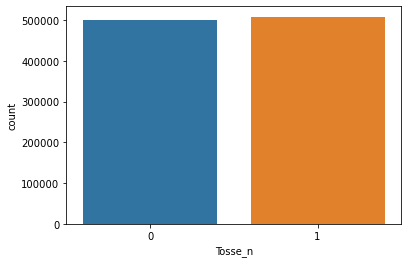

In [204]:
#Sintoma - Tosse
sns.countplot(x='Tosse_n',data=confirmados)

<AxesSubplot:xlabel='Coriza_n', ylabel='count'>

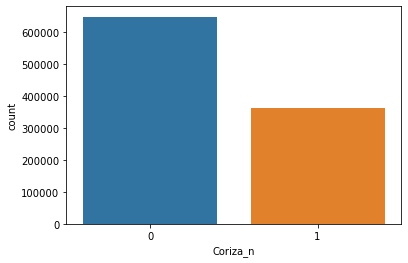

In [205]:
#Sintoma - Coriza
sns.countplot(x='Coriza_n',data=confirmados)

<AxesSubplot:xlabel='Diarreia_n', ylabel='count'>

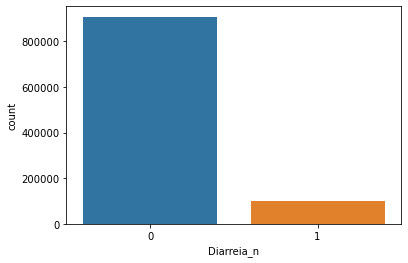

In [206]:
#Sintoma - Diarreia
sns.countplot(x='Diarreia_n',data=confirmados)

<AxesSubplot:xlabel='DorGarganta_n', ylabel='count'>

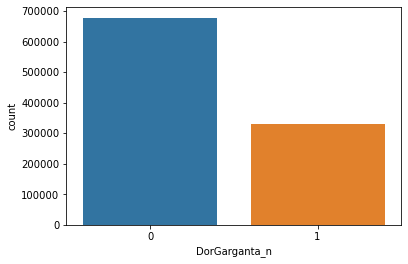

In [207]:
#Sintoma - Dor de garganta
sns.countplot(x='DorGarganta_n',data=confirmados)

<AxesSubplot:xlabel='Cefaleia_n', ylabel='count'>

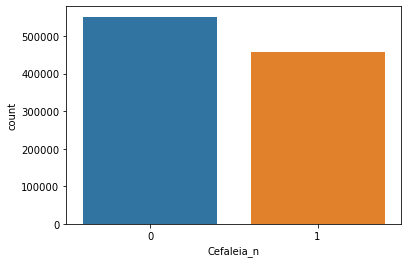

In [208]:
#Sintoma -Cefaleia
sns.countplot(x='Cefaleia_n',data=confirmados)

<AxesSubplot:xlabel='DificuldadeRespiratoria_n', ylabel='count'>

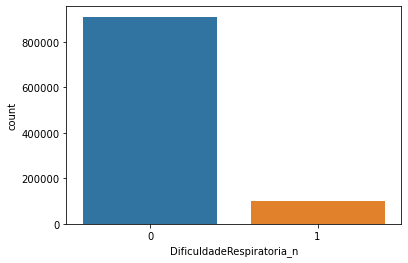

In [209]:
#Sintoma - Dificuldade Respiratória
sns.countplot(x='DificuldadeRespiratoria_n',data=confirmados)

<AxesSubplot:xlabel='comorbidadePulmao', ylabel='count'>

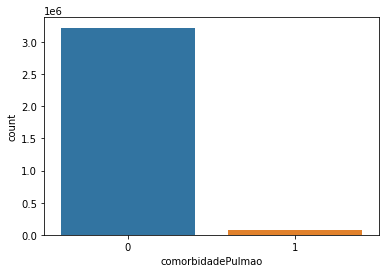

In [210]:
#Comorbidade - Pulmonar
sns.countplot(x='comorbidadePulmao',data=CovidES)

<AxesSubplot:xlabel='comorbidadeCardio', ylabel='count'>

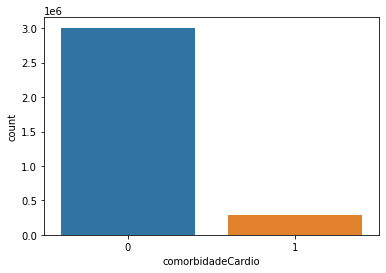

In [211]:
#Comorbidade - Cardiaca
sns.countplot(x='comorbidadeCardio',data=CovidES)

<AxesSubplot:xlabel='comorbidadeRenal', ylabel='count'>

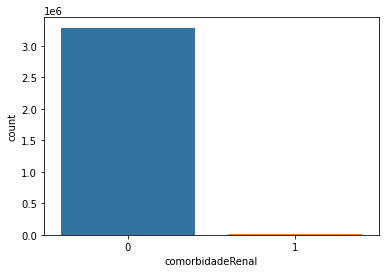

In [212]:
#Comorbidade - Renal
sns.countplot(x='comorbidadeRenal',data=CovidES)

<AxesSubplot:xlabel='comorbidadeDiabetes', ylabel='count'>

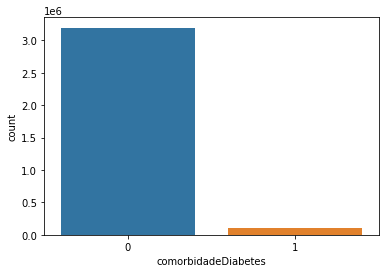

In [213]:
#Comorbidade - Diabetes
sns.countplot(x='comorbidadeDiabetes',data=CovidES)

<AxesSubplot:xlabel='comorbidadeTabagismo', ylabel='count'>

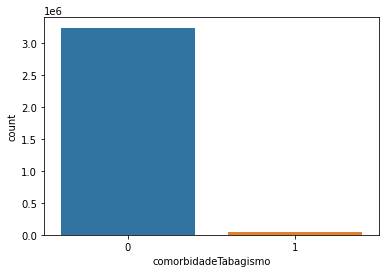

In [214]:
#Comorbidade Tabagismo
sns.countplot(x='comorbidadeTabagismo',data=CovidES)

<AxesSubplot:xlabel='comorbidadeObesidade', ylabel='count'>

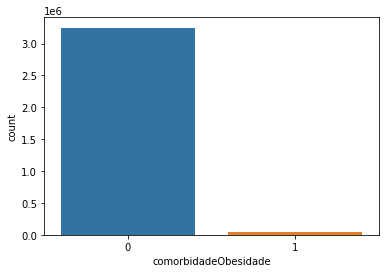

In [215]:
#Comorbidade Obesidade
sns.countplot(x='comorbidadeObesidade',data=CovidES)

# Aplicando o modelo

In [216]:
correlacao = CovidES.corr()

<AxesSubplot:>

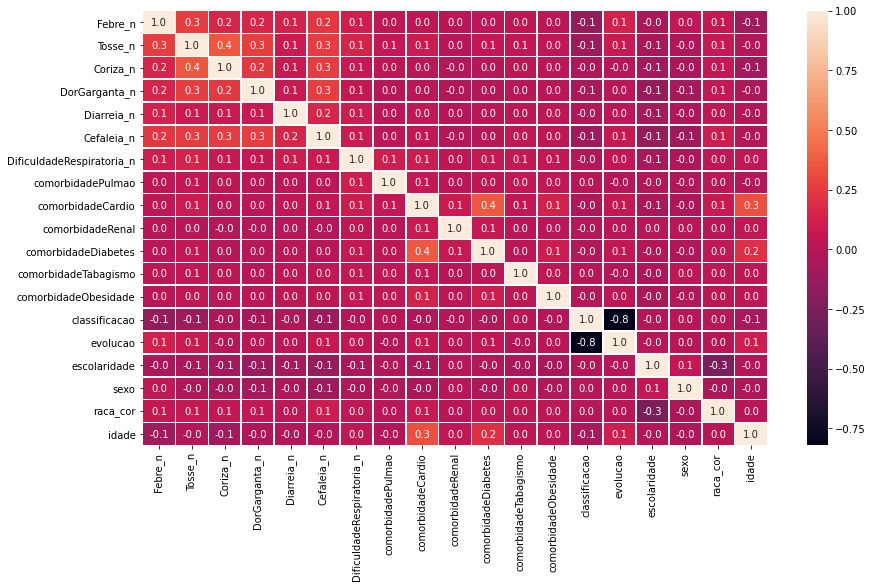

In [217]:
plt.figure(figsize=(14,8))
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

In [218]:
CovidES['classificacao'].value_counts()

2    1795808
0    1009355
1     488533
Name: classificacao, dtype: int64

In [219]:
#criando um novo dataset com valores padronizados de classificação
classifier_covid  = CovidES[CovidES['classificacao']==0].sample(n=500000)

In [220]:
#adicionando o mesmo numero de confirmados de forma aleatoria

classifier_covid = classifier_covid.append(CovidES[CovidES['classificacao'] == 2].sample(n=500000))

In [221]:
#validando os valores
classifier_covid['classificacao'].value_counts()

0    500000
2    500000
Name: classificacao, dtype: int64

In [222]:
classifier_covid.columns

Index(['Classificacao', 'Evolucao', 'FaixaEtaria', 'IdadeNaDataNotificacao',
       'Sexo', 'RacaCor', 'Escolaridade', 'Febre_n', 'Tosse_n', 'Coriza_n',
       'DorGarganta_n', 'Diarreia_n', 'Cefaleia_n',
       'DificuldadeRespiratoria_n', 'dataNotificacao', 'dataCadastro',
       'comorbidadePulmao', 'comorbidadeCardio', 'comorbidadeRenal',
       'comorbidadeDiabetes', 'comorbidadeTabagismo', 'comorbidadeObesidade',
       'classificacao', 'evolucao', 'escolaridade', 'sexo', 'raca_cor',
       'idade'],
      dtype='object')

In [223]:
#removendo colunas que nao serão utilizadas
classifier_covid.drop(columns=['Classificacao', 'Evolucao', 'FaixaEtaria','IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade'],inplace=True)

In [225]:
#excluindo outras colunas que nao serao utilizadas no modelo
classifier_covid.drop(columns=['dataCadastro','dataNotificacao'],inplace=True)

In [226]:
#removendo valores nulos
classifier_covid.dropna(inplace=True)

In [227]:
#validando os valores
classifier_covid['classificacao'].value_counts()

0    500000
2    500000
Name: classificacao, dtype: int64

In [228]:
classifier_covid.columns

Index(['Febre_n', 'Tosse_n', 'Coriza_n', 'DorGarganta_n', 'Diarreia_n',
       'Cefaleia_n', 'DificuldadeRespiratoria_n', 'comorbidadePulmao',
       'comorbidadeCardio', 'comorbidadeRenal', 'comorbidadeDiabetes',
       'comorbidadeTabagismo', 'comorbidadeObesidade', 'classificacao',
       'evolucao', 'escolaridade', 'sexo', 'raca_cor', 'idade'],
      dtype='object')

In [229]:
#importando o train test split - Cria as bases de teste e treino do modelo
from sklearn.model_selection import train_test_split

In [230]:
#criando as variaveis que receberão os valores de treino e test
x_train,x_test,y_train,y_test = train_test_split(classifier_covid.drop(columns=['classificacao','escolaridade','evolucao','escolaridade','comorbidadeCardio','comorbidadeDiabetes','comorbidadeTabagismo','comorbidadeObesidade','comorbidadeRenal','comorbidadePulmao']),classifier_covid['classificacao'],test_size=0.3,random_state=42)

In [231]:
x_train

,Febre_n,Tosse_n,Coriza_n,DorGarganta_n,Diarreia_n,Cefaleia_n,DificuldadeRespiratoria_n,sexo,raca_cor,idade
266180,0,0,0,0,0,0,0,1,3,63
1530447,0,0,0,1,0,1,0,1,-1,53
1966135,0,0,0,0,0,0,0,1,-1,25
1079310,0,0,0,0,0,0,0,0,0,33
3029475,1,1,1,1,0,1,0,1,1,28
...,...,...,...,...,...,...,...,...,...,...
2661483,1,0,0,1,0,1,0,1,2,17
843219,0,0,0,0,0,0,0,1,0,54
824177,1,1,1,0,0,1,0,1,3,32
1697603,0,0,0,0,0,0,0,1,-1,34


In [232]:
#importando a biblioteca Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

In [233]:
#criando uma variavel para o modelo
model = GaussianNB()

In [234]:
#treinando o modelo
model.fit(x_train,y_train)

GaussianNB()

In [235]:
#prevendo os valores com o modelo
predicted = model.predict(x_test)

In [236]:
#analisando o desempenho do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [237]:
# imprimindo o relatorio de classsificação
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56    149813
           2       0.57      0.60      0.59    150187

    accuracy                           0.58    300000
   macro avg       0.58      0.58      0.58    300000
weighted avg       0.58      0.58      0.58    300000



In [238]:
print(accuracy_score(y_test,predicted))

0.5764466666666667


## Análise de Série Temporal

In [239]:
#caso nao possua, é necessario realizar a instalação do pmd_arima
!pip install pmdarima

In [240]:
#importando a bilioteca auto_arima
from pmdarima.arima import auto_arima

In [241]:
#executando o modelo
prev_arima = auto_arima(temporal_es)

In [85]:
#analisando tamanho da base
len(temporal_es)

696

In [124]:
#criando variavel de treino
train = temporal_es[:660]
train.shape

(660, 1)

In [125]:
#criando variavel de teste
test = temporal_es[660:]
test.shape

(36, 1)

In [126]:
#criando a variavel que recebera o resultado do treino
novo_modelo = auto_arima(train,suppress_warnings=True)

In [127]:
#criando o Dataframe que receberá o resultado da predição dos periodos
valores_previstos = pd.DataFrame(novo_modelo.predict(n_periods=36),index=test.index)
valores_previstos.columns = ['Classificacao']

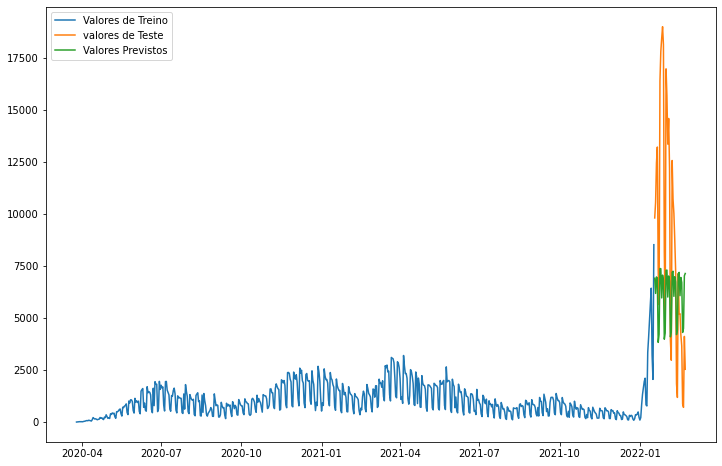

In [129]:
#Plotando grafico de comparação de valores previstos e valores reais
plt.figure(figsize=(12,8))
plt.plot(train, label = 'Valores de Treino')
plt.plot(test, label = 'valores de Teste')
plt.plot(valores_previstos, label = 'Valores Previstos')
plt.legend();

In [142]:
#realizando uma nova tentativa com um periodo mais ao centro do modelo
train_1 = temporal_es[:500]
train_1.shape

(500, 1)

In [143]:
test_1 = temporal_es[500:600]
test_1.shape

(100, 1)

In [144]:
novo_modelo_1 = auto_arima(train_1,suppress_warnings=True)

In [145]:
valores_previstos_1 = pd.DataFrame(novo_modelo_1.predict(n_periods=100),index=test_1.index)
valores_previstos_1.columns = ['Classificacao']

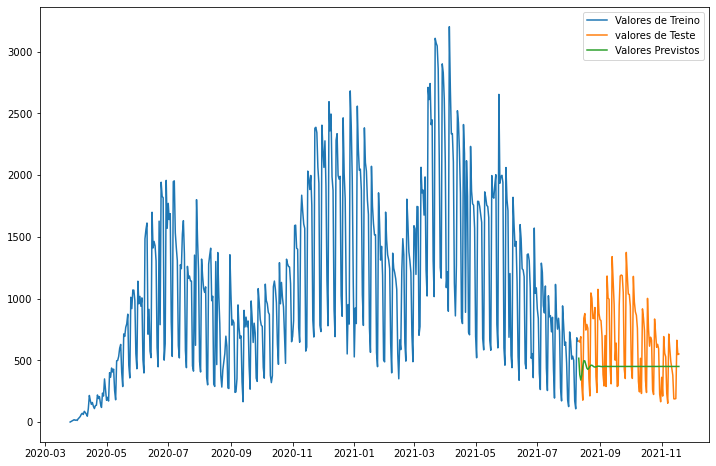

In [146]:
#plotando o grafico da segunda analise
plt.figure(figsize=(12,8))
plt.plot(train_1, label = 'Valores de Treino')
plt.plot(test_1, label = 'valores de Teste')
plt.plot(valores_previstos_1, label = 'Valores Previstos')
plt.legend();